<a href="https://colab.research.google.com/github/Ashwitha2305/AIML-2025/blob/main/AIIML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split




In [ ]:
classified_data=pd.read_csv("/content/Classified_Data.txt")

In [15]:
df = pd.read_table("Classified_Data.txt",sep=',', index_col=0)
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [ ]:
columns = classified_data.columns
print(columns)


Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')


In [ ]:
print(classified_data.dtypes)

Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object


In [16]:
summary=classified_data.describe(percentiles=[.25, .50, .75,.90])
print(summary)

        Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.223127     0.983470   
max     999.000000     1.721779     1.833757     1.722725     1.634884   

               LQE          QWG          FDJ          PJF          HQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.032336     0.943534     0.963422     1.071960     1.158251   
std       0.243413     0.256121     0

In [10]:
classified_data.describe()

Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
max     999.000000     1.721779     1.833757     1.722725     1.634884   

               LQE          QWG          FDJ          PJF          HQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.032336     0.943534     0.963422     1.071960     1.158251   
std       0.243413     0.256121     0.255118     0.288982     0.293738   
min       0.315307     0.262389     0.295228     0.299476     0.365157   
25%       0.870855     0.761064     0.784407     0.866306     0.934340   
50%       1.035824     0.941502     0.945333     1.065500     1.165556   
75%       1.198270     1.123060     1.134852     1.283156     1.383173   
max       1.650050     1.666902     1.713342     1.785420     1.885690   

               NXJ  TARGET CLASS  
count  1000.000000    1000.00000  
mean      1.362725       0.50000  
std       0.204225       0.50025  
min       0.639693       0.00000  
25%       1.222623       0.00000  
50%       1.375368       0.50000  
75%       1.504832       1.00000  
max       1.893950       1.00000

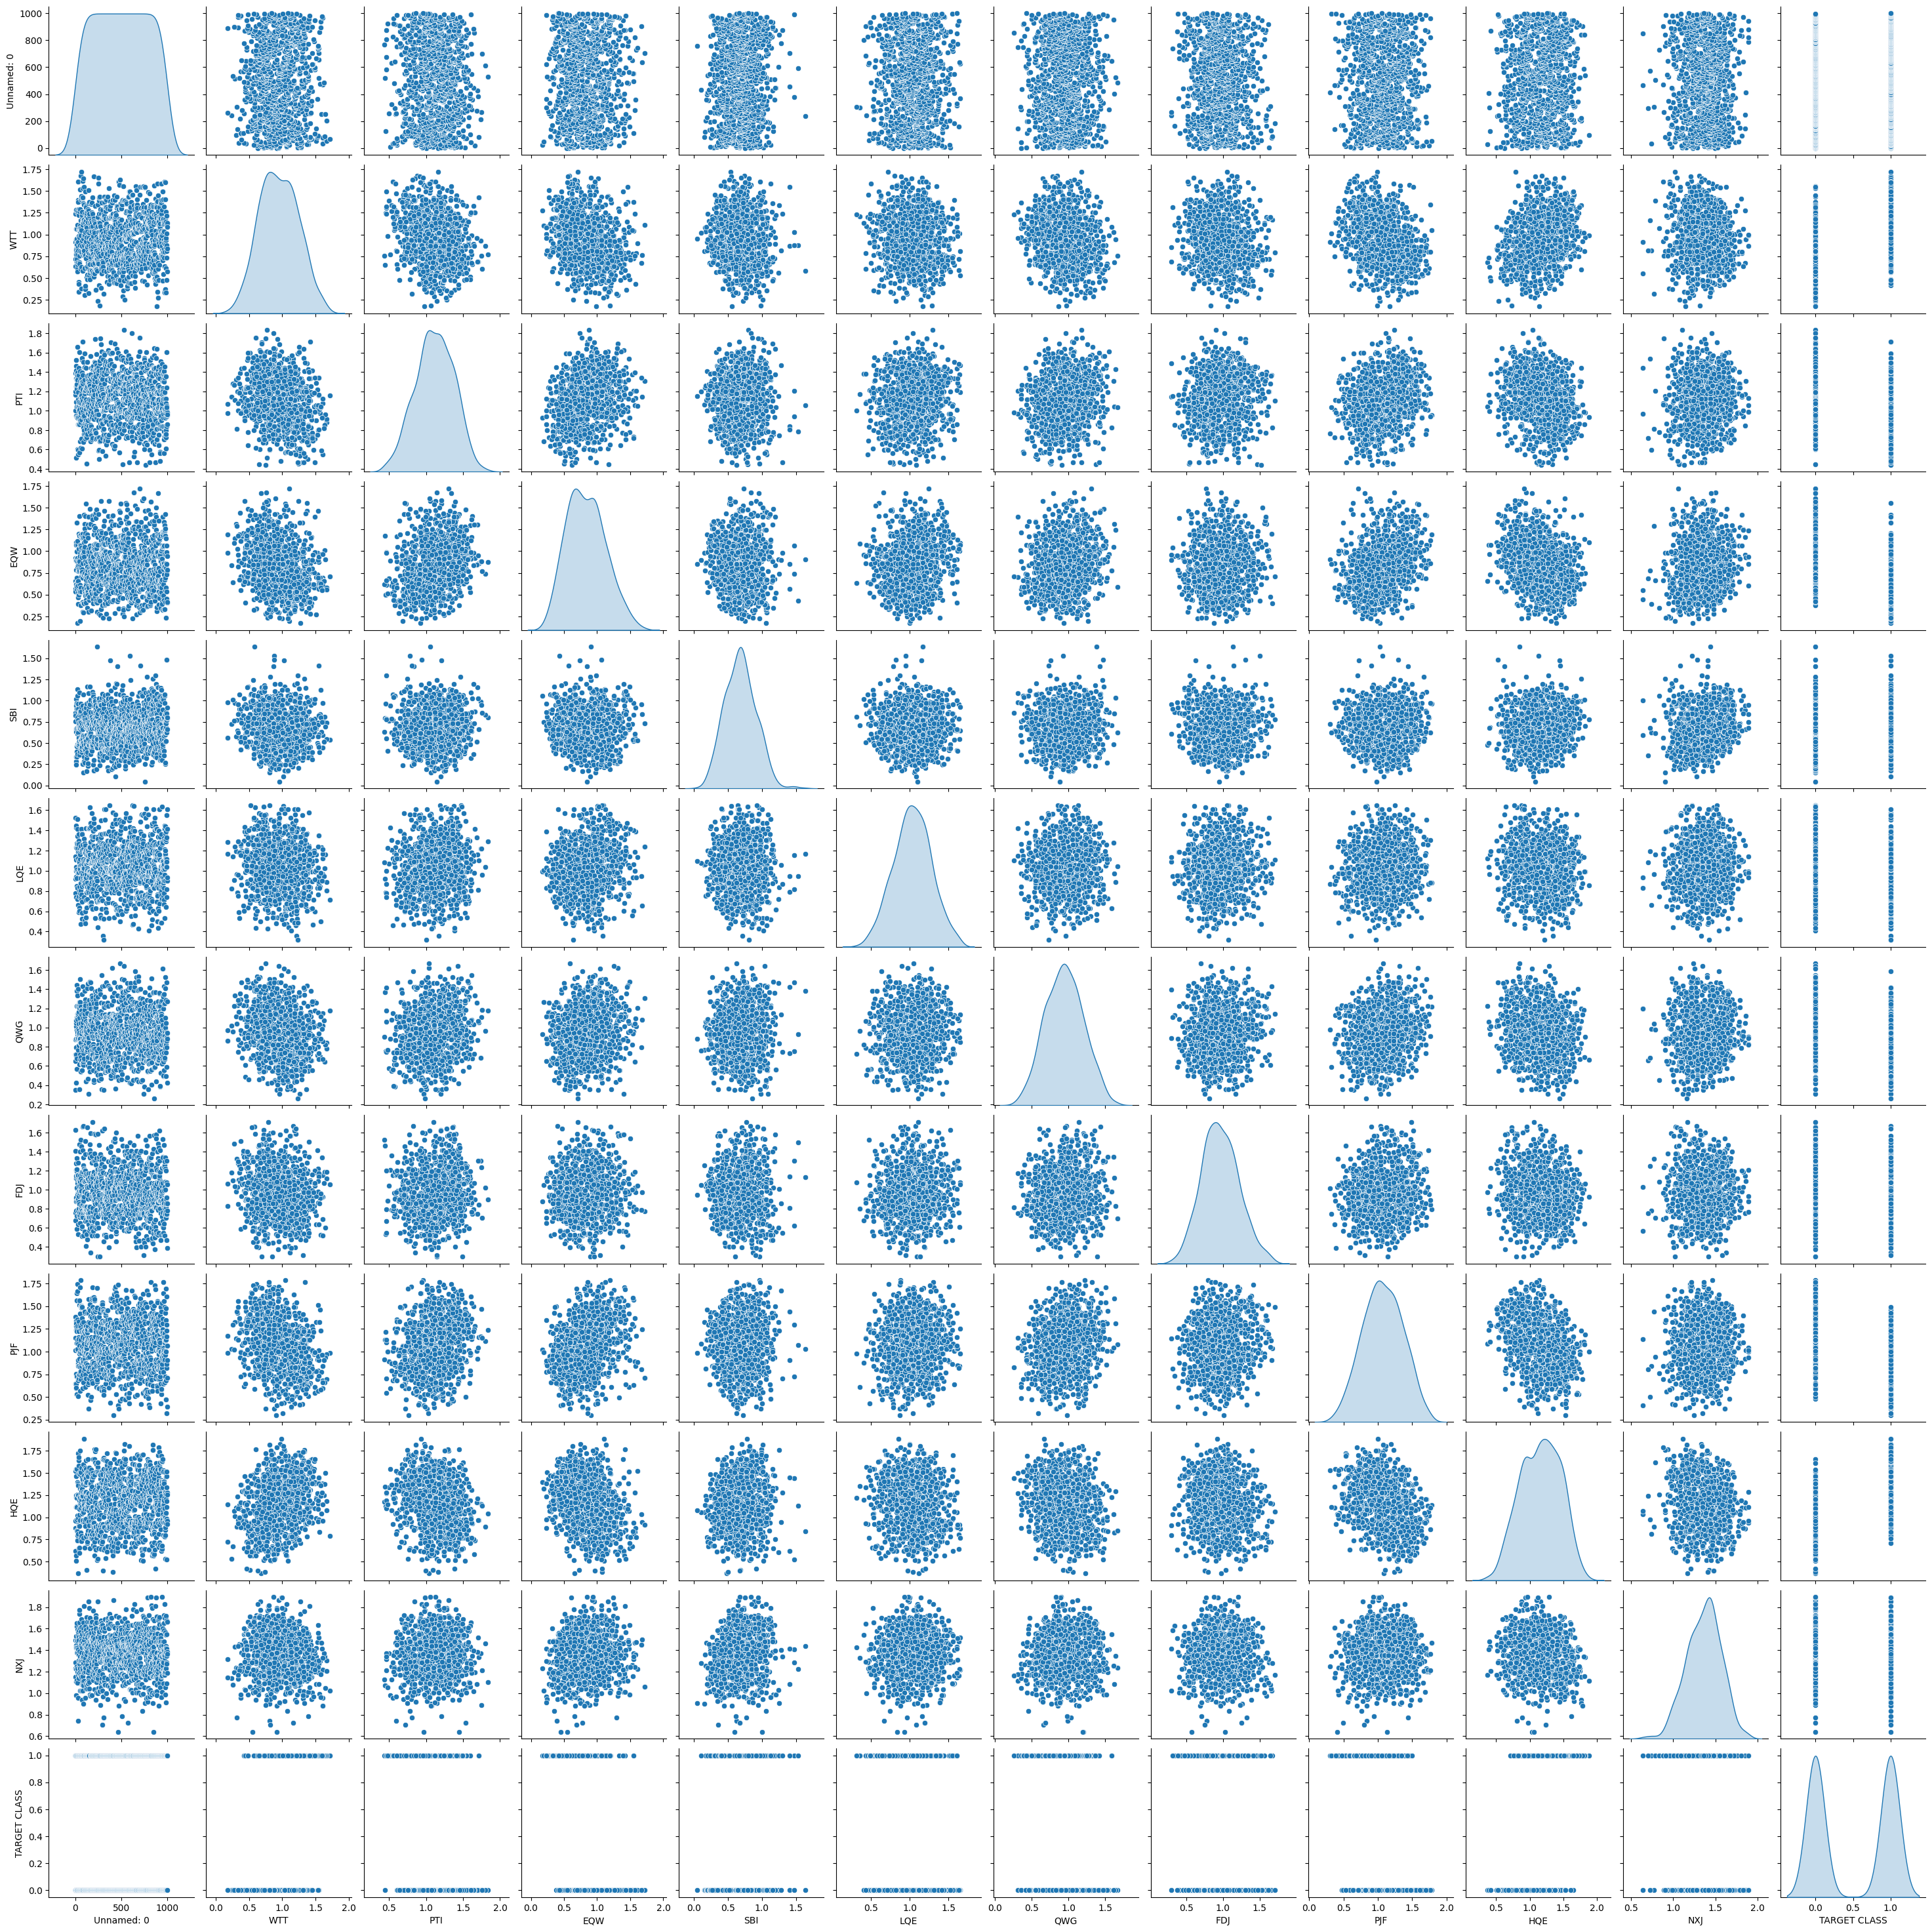

In [ ]:
sns.pairplot(classified_data, diag_kind='kde')
plt.show()

In [12]:
l=list(classified_data.columns)
l[0:len(l)-1]

['Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ']

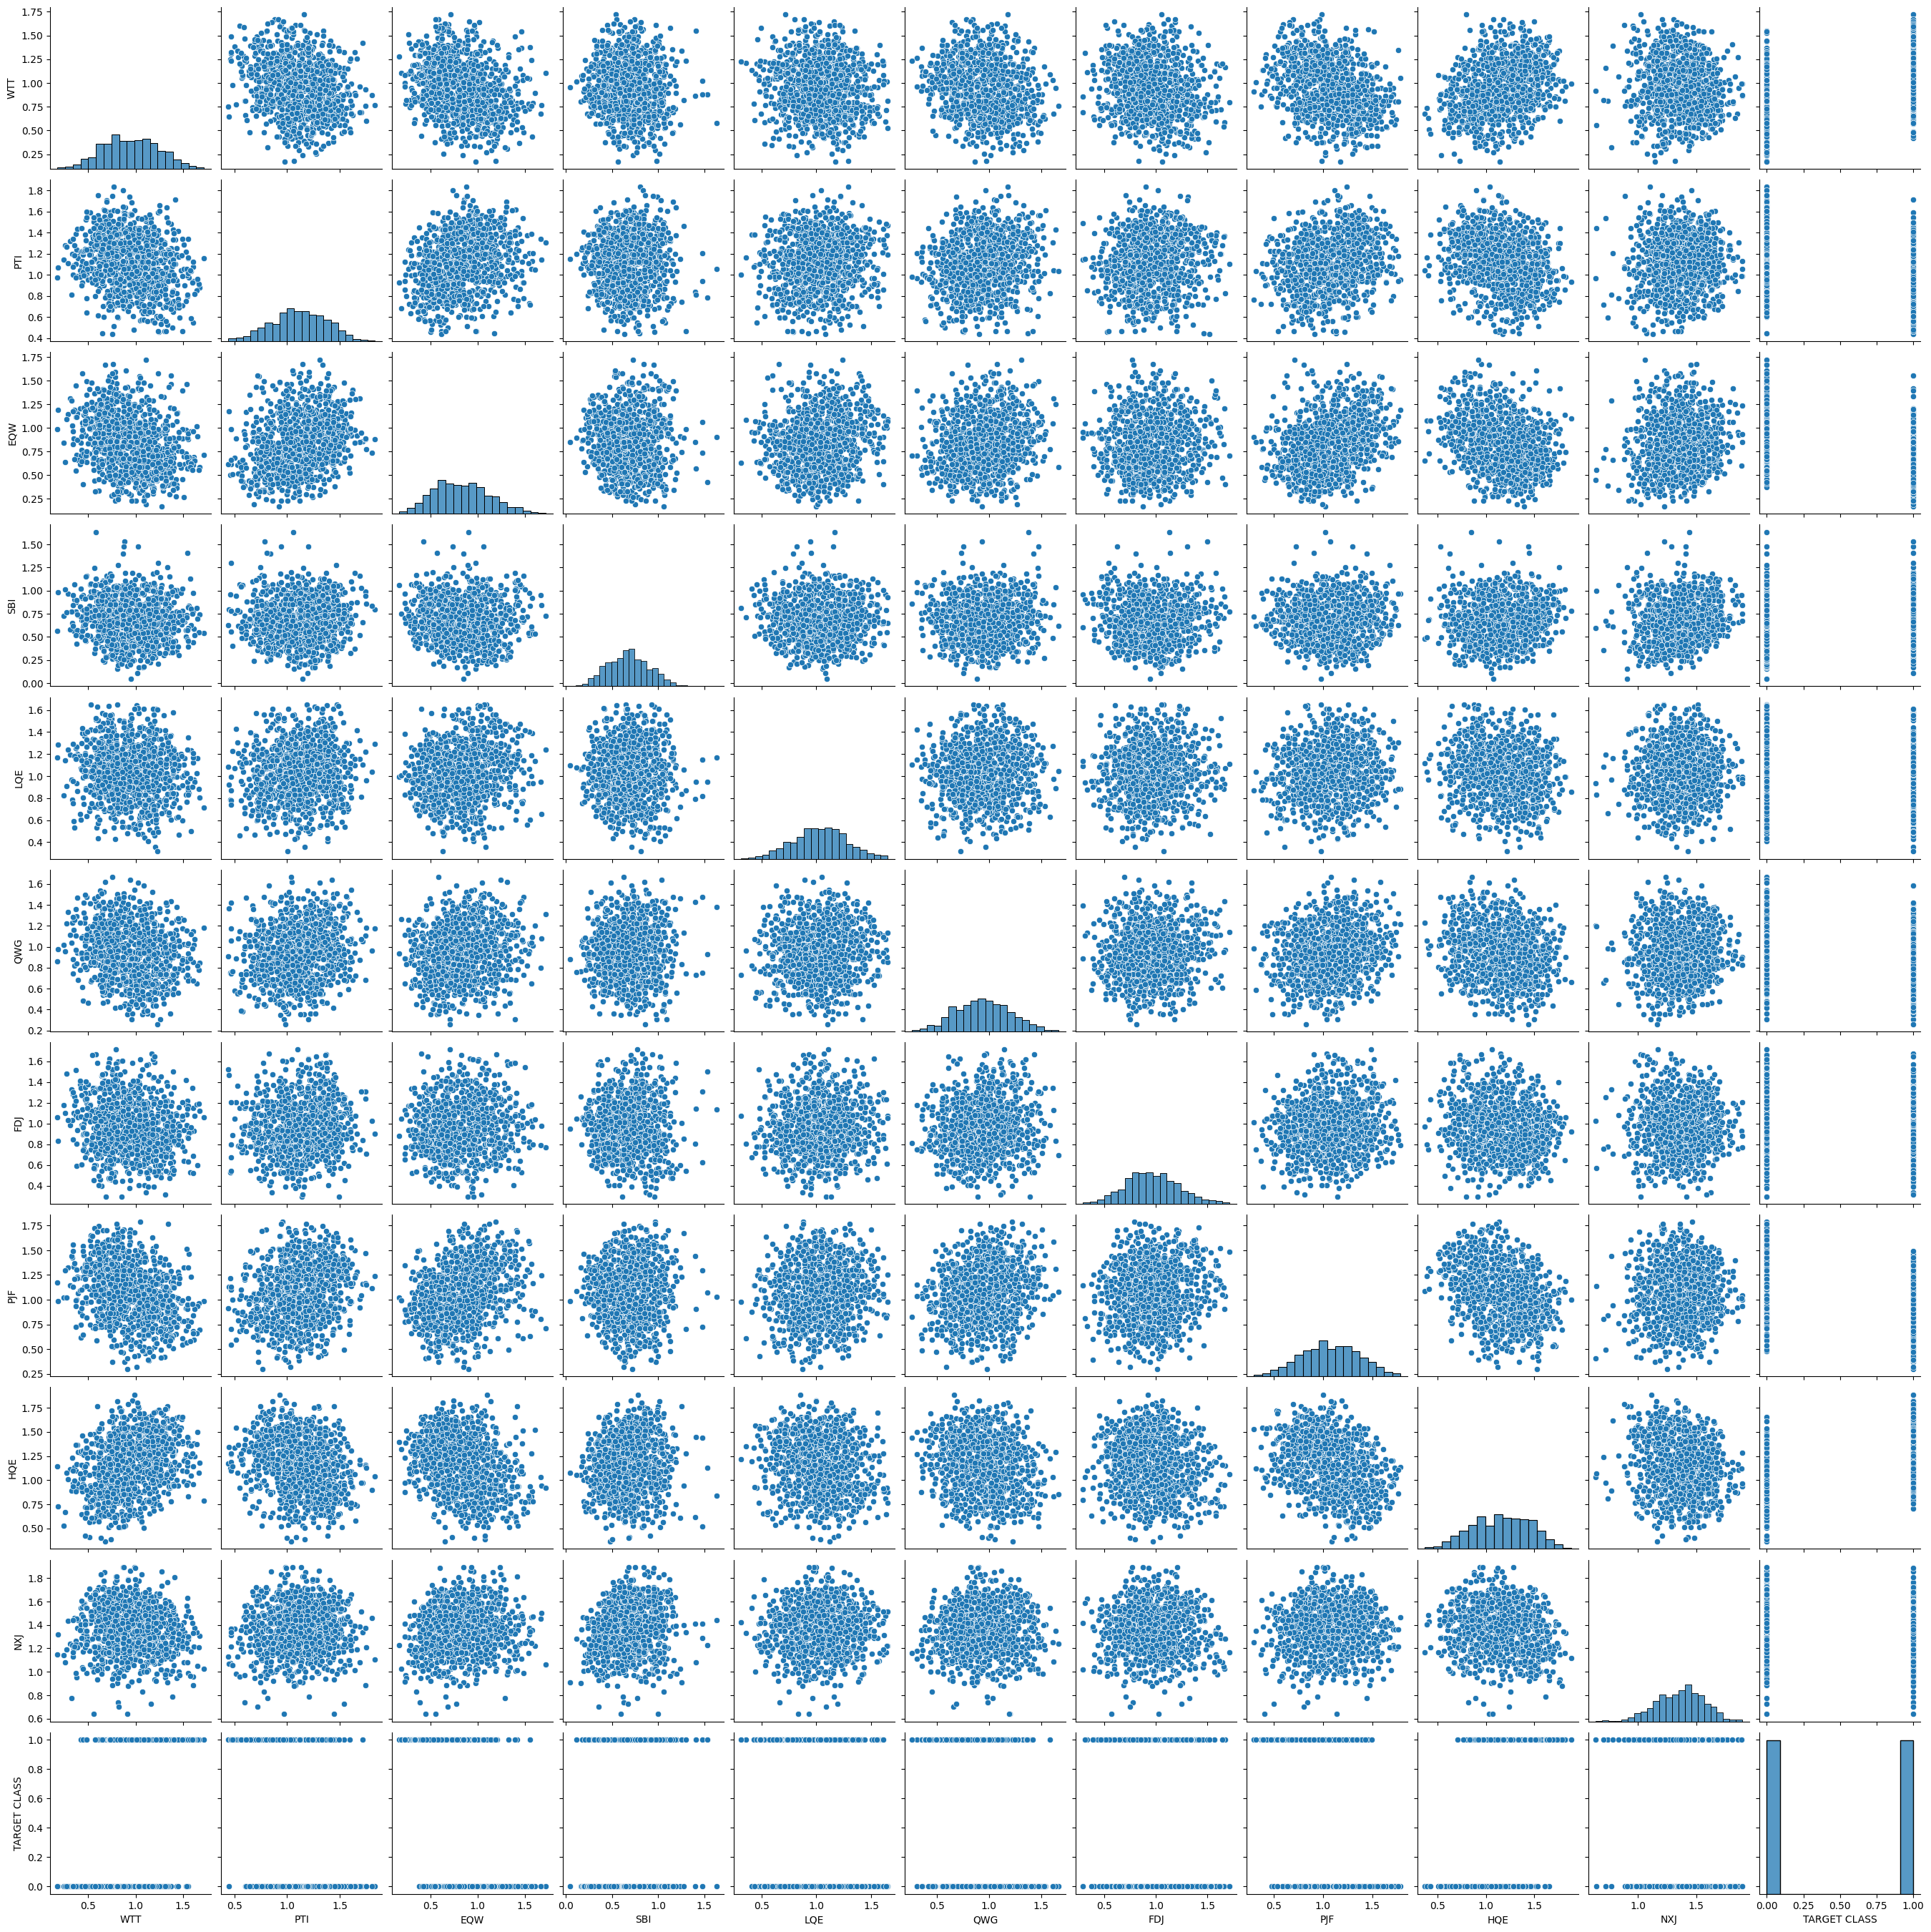

In [17]:
sns.pairplot(df)

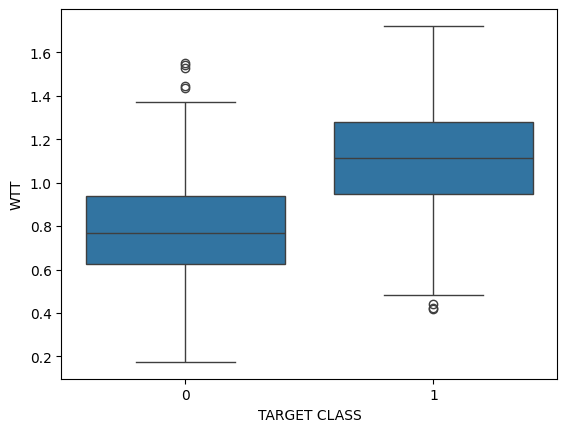

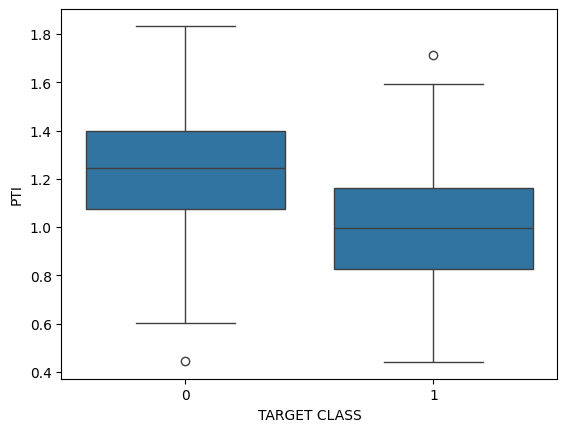

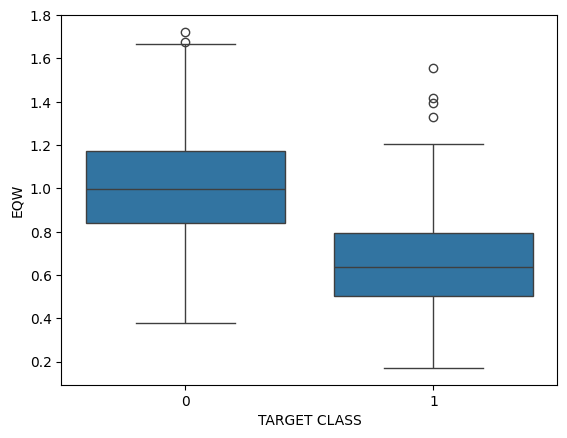

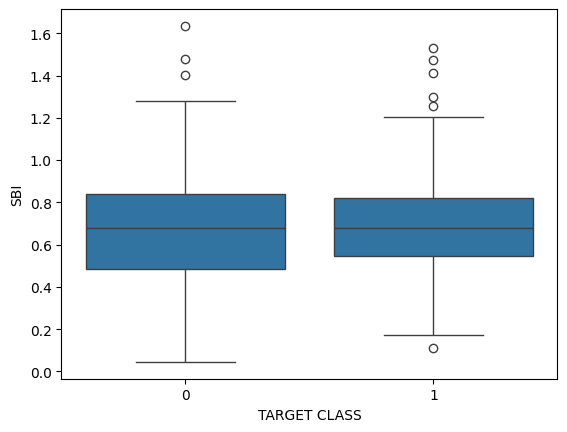

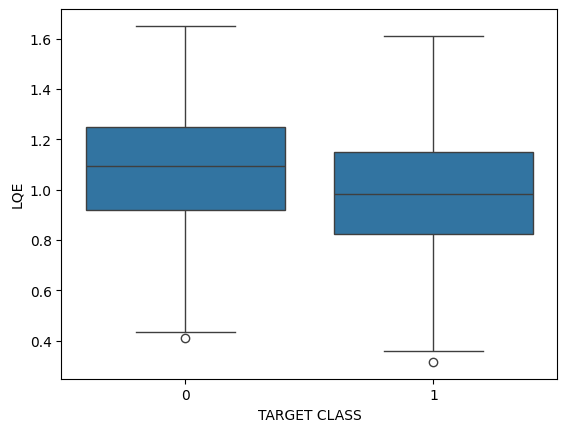

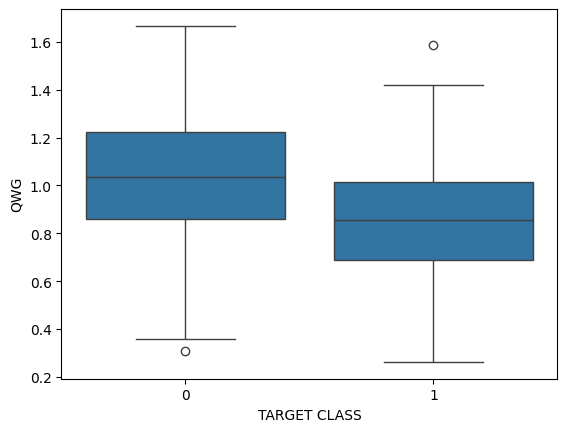

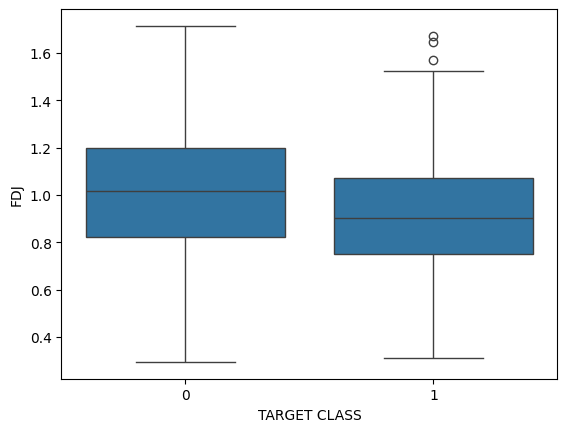

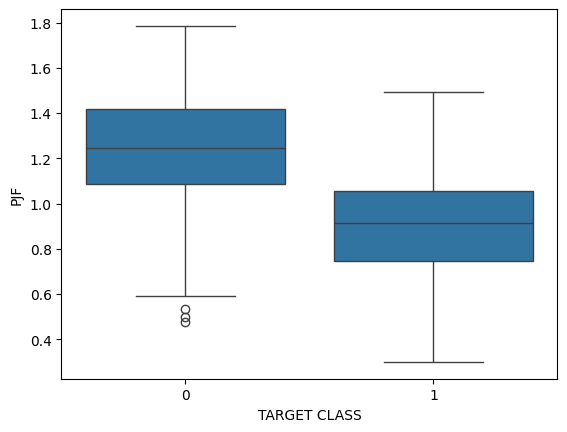

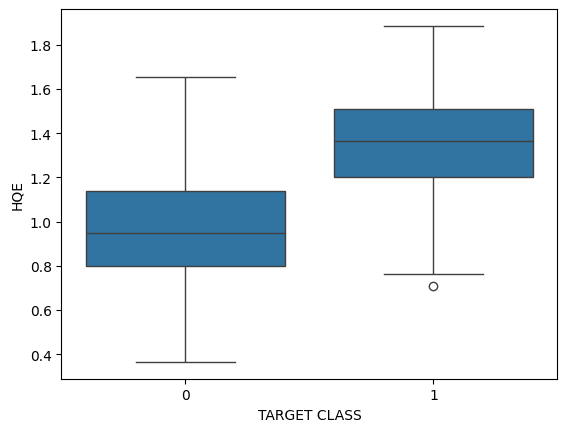

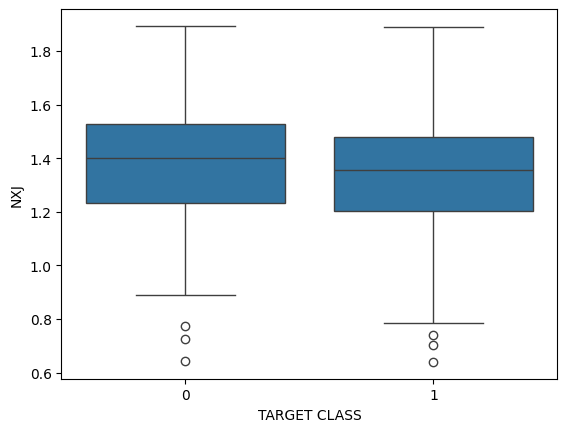

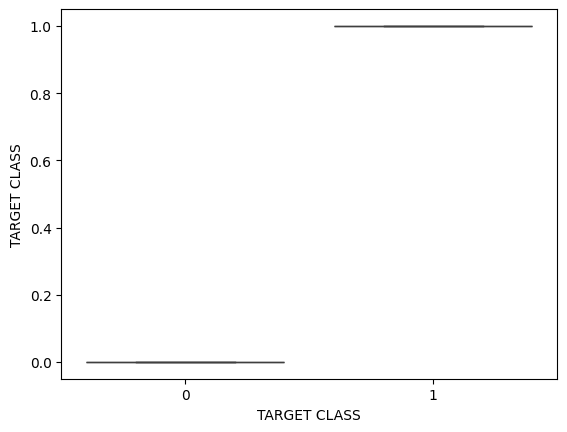

<Figure size 640x480 with 0 Axes>

In [54]:
for i in range(1,len(l)): # Start the loop from index 1 to skip 'Unnamed: 0'
   sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
   plt.figure()

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [57]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [35]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test =train_test_split(scaled_features,df["TARGET CLASS"])
train_test_split(scaled_features,df['TARGET CLASS'],
                 test_size=0.20, random_state=101)

[array([[-3.01926986e-01,  7.47955844e-01, -3.63076616e-01, ...,
          1.95011097e+00,  1.89381083e-01, -2.08738055e-01],
        [-9.74847339e-01,  9.34357987e-01,  3.22827973e-01, ...,
          1.33691711e+00,  7.50487725e-01, -5.79808129e-04],
        [ 2.76042367e-01,  1.28101372e+00, -1.00470095e+00, ...,
         -5.07389728e-01,  1.40045639e+00,  4.10986535e-01],
        ...,
        [ 1.26036459e+00, -8.71014783e-01, -6.09515811e-01, ...,
         -1.27692778e+00,  1.32459392e+00, -1.76962923e+00],
        [-1.29207260e+00,  9.32941275e-01, -1.74264706e+00, ...,
         -1.17927185e+00, -2.30602519e-01, -9.47717504e-01],
        [-1.28849983e+00, -7.68075340e-01, -3.13314834e-01, ...,
         -6.17405507e-02, -7.74475056e-01, -4.98356963e-02]]),
 array([[-0.62185545,  0.60763365,  1.09527083, ...,  1.58274119,
         -0.6719008 ,  0.97487268],
        [-0.42292472,  0.23895017, -0.18678697, ...,  1.30134411,
          0.32337549,  0.24341049],
        [-1.99586183, -0.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:

  KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

In [53]:
pred = knn.predict(X_test)

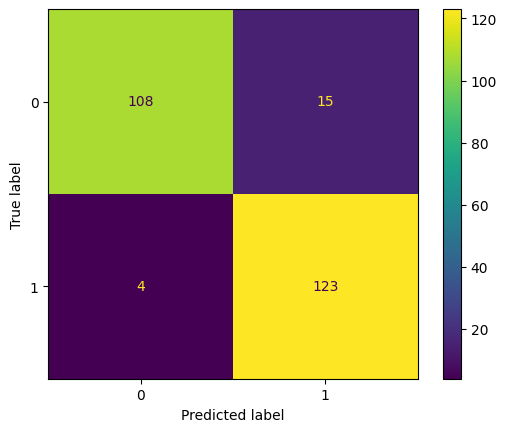

In [52]:
#from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # import matplotlib

conf_mat=confusion_matrix(y_test,pred)
#print(conf_mat)
# Calculate confusion matrix

#cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [45]:

  print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       123
           1       0.89      0.97      0.93       127

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



In [46]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.076


In [58]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

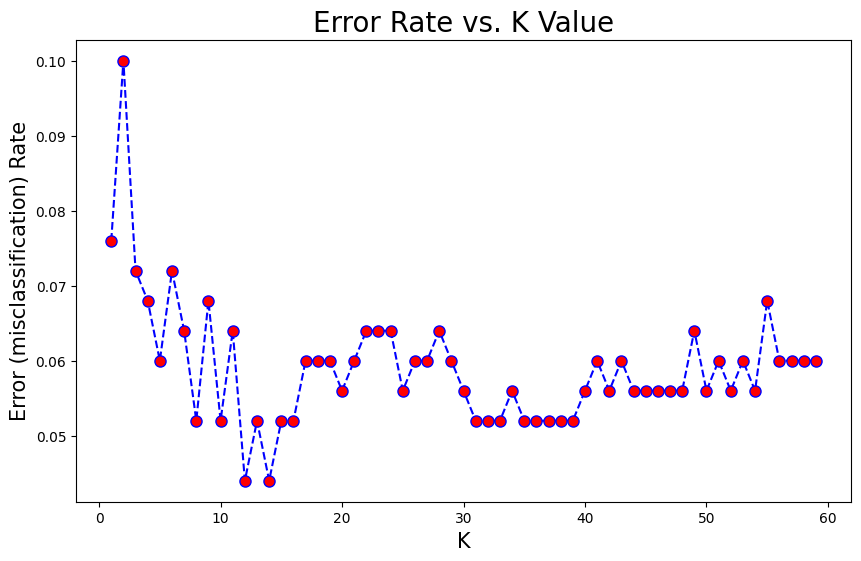

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)